Possible black box models (until Sunday)
•	https://www.kaggle.com/code/sadikaljarif/dog-breed-identification

1.	Choose the kaggle model (probably NN)

ResNet-50 is the CNN that we will use


Possible XAI models

The LIME (Local Interpretable Model-agnostic Explanations) technique of Explainable AI (XAI) can work with ResNet-50. LIME is designed to be model-agnostic, which means it can be used to interpret the output of any classifier, including complex neural networks like ResNet-50.


In [1]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dog-breed-identification/labels.csv')
train = "dog-breed-identification/train/"
test="dog-breed-identification/test/"

In [3]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


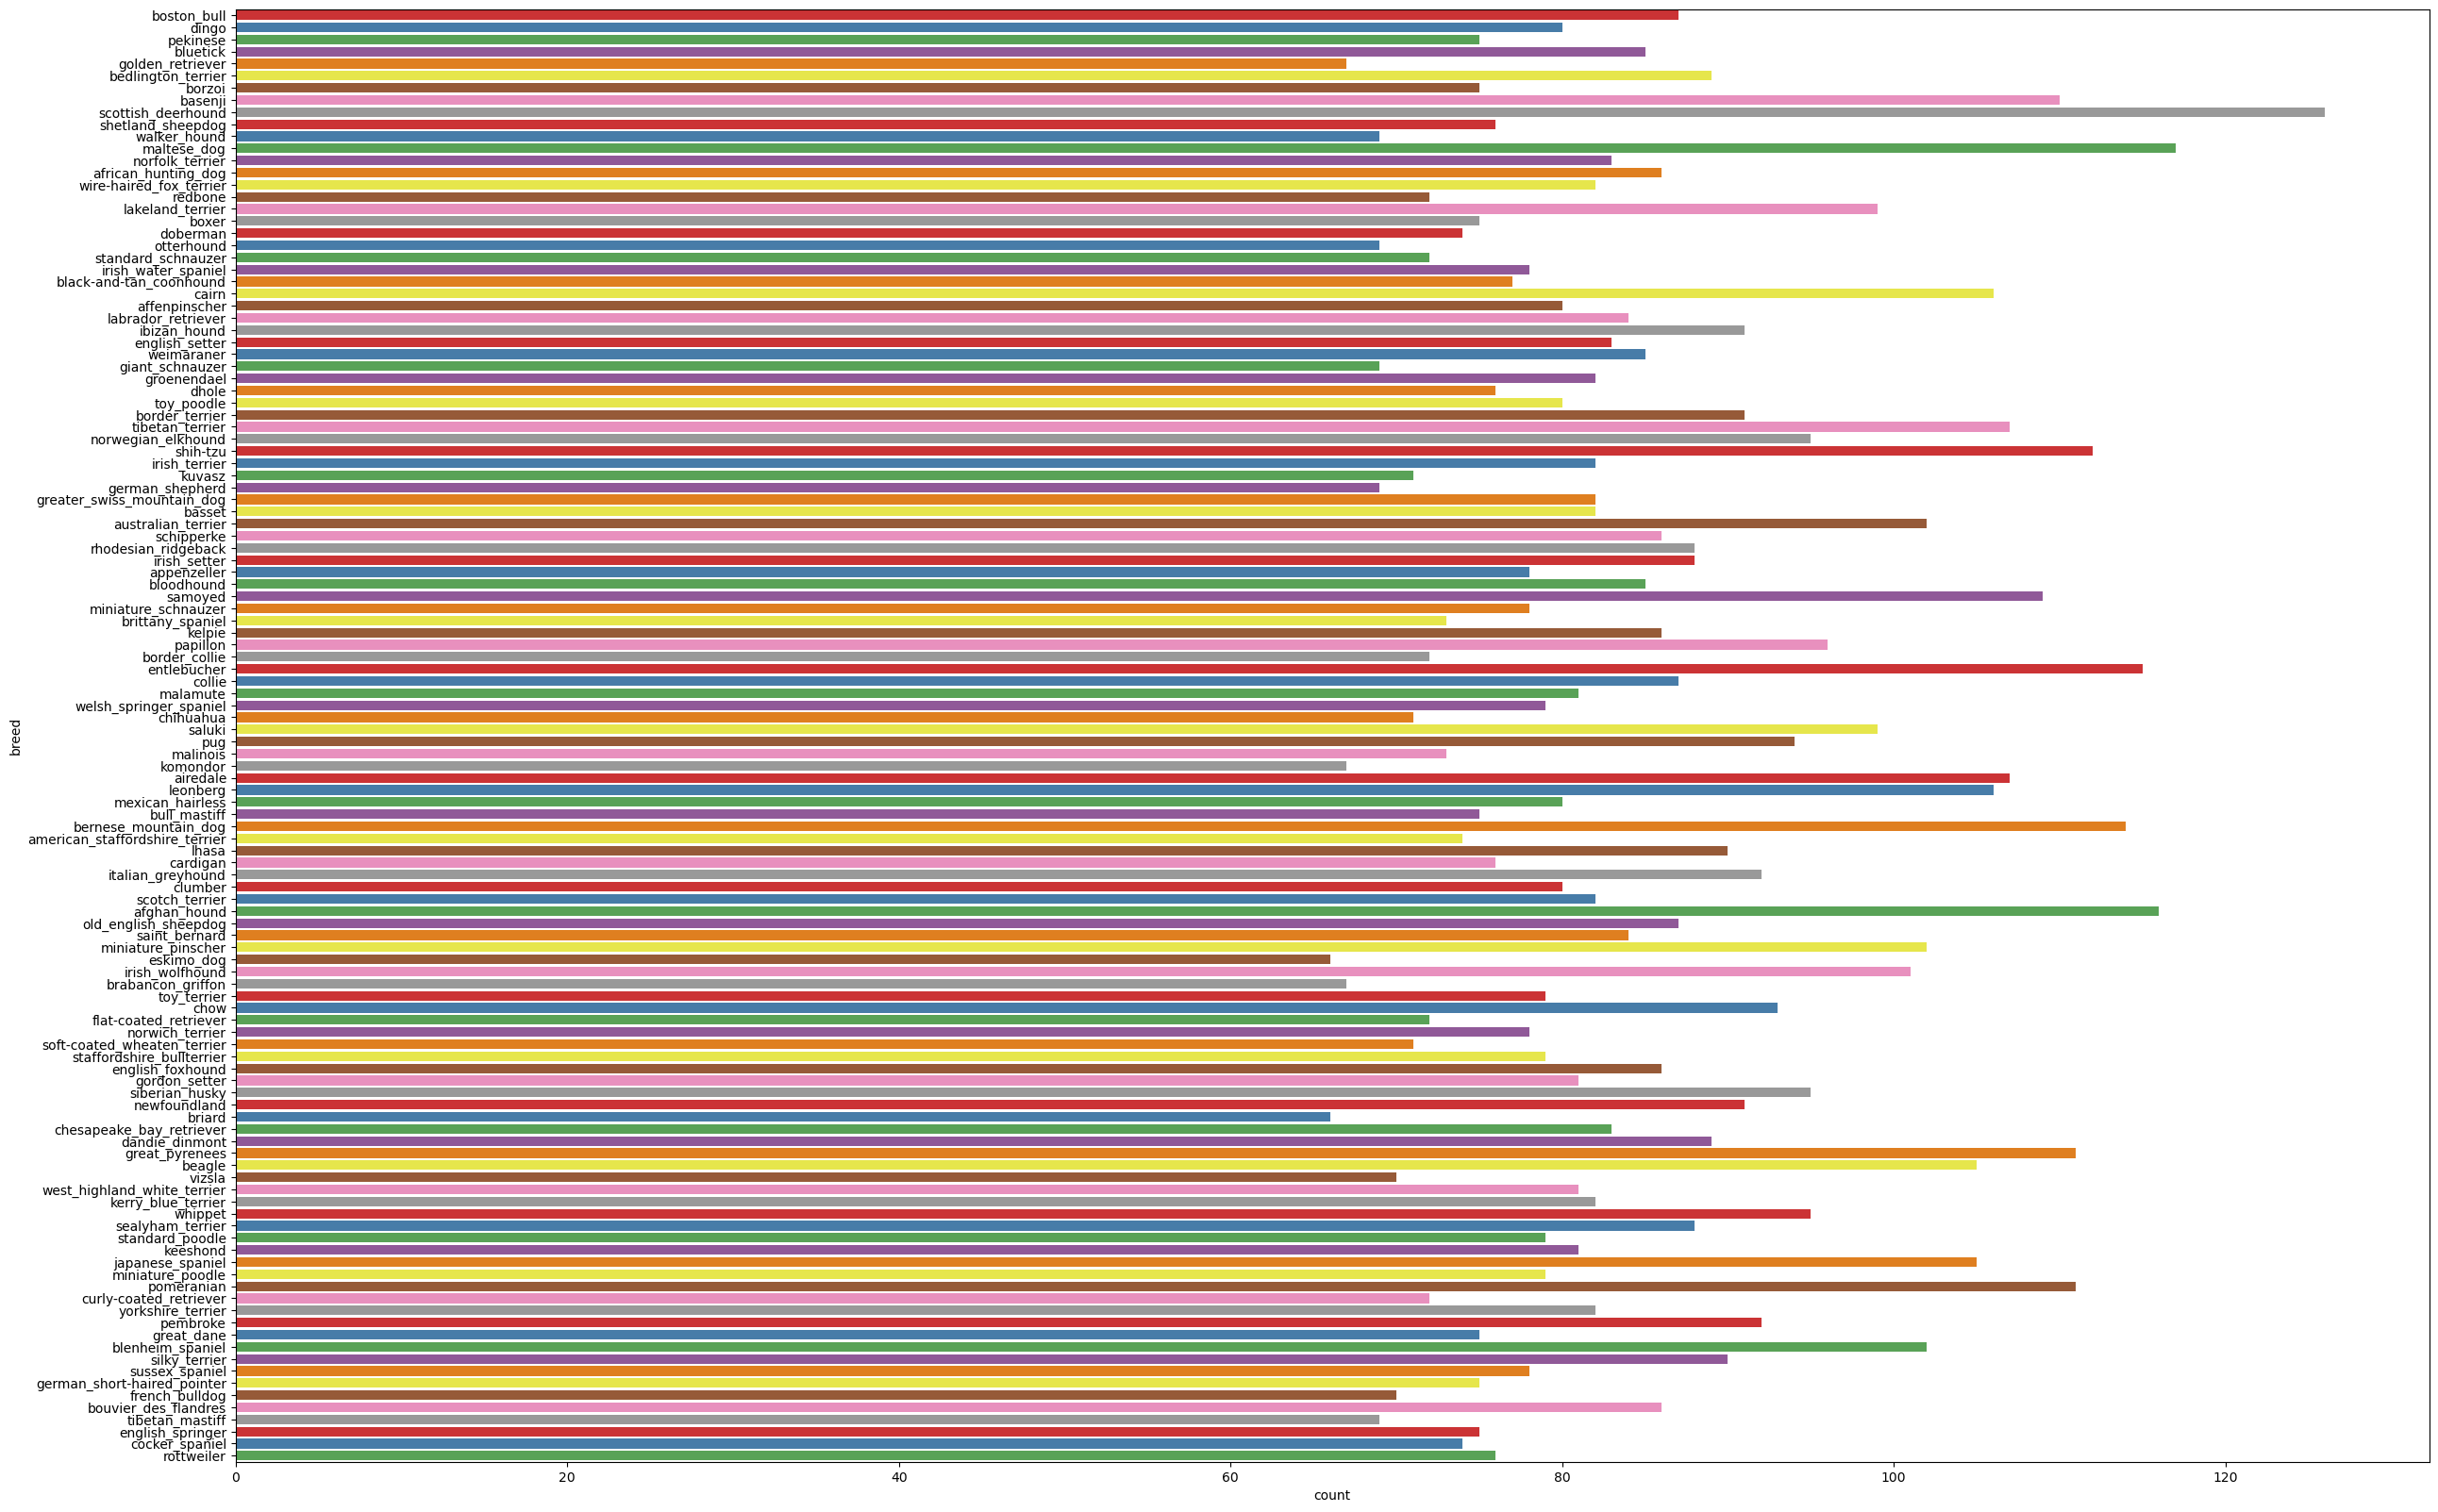

In [4]:
plt.figure(figsize=(30,20))
sns.countplot(y="breed",data=df,palette="Set1")
plt.show()

Visualize Train Data

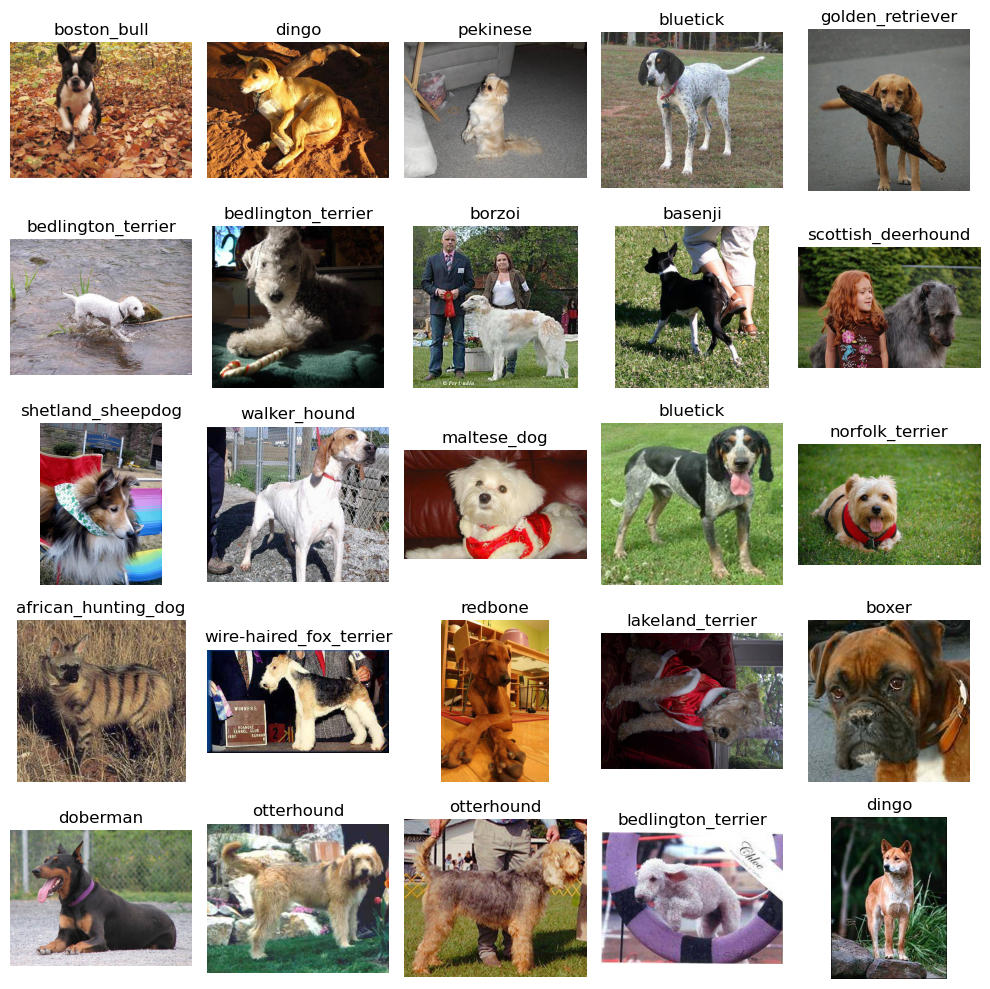

In [5]:
nrow=5
ncol=5
fig,ax=plt.subplots(nrow,ncol,figsize=(10,10))
for i,(img_id,breed) in enumerate(df[["id","breed"]].values[: nrow*ncol]):
    image_path=os.path.join(train,img_id+".jpg")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    row=i//ncol
    col=i%ncol
    ax[row,col].imshow(image)
    ax[row,col].set_title(breed)
    ax[row,col].axis("off")
    
plt.tight_layout()
plt.show()

In [6]:
print("Total number of unique Dog Breeds :",len(df.breed.unique()))

Total number of unique Dog Breeds : 120


In [7]:
from sklearn.preprocessing import LabelEncoder
num_breed = 120
image_size = 200
batch_size = 32
encoder = LabelEncoder()

In [8]:
breed=list(df["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
df=df.query("breed in @new")
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [9]:
df['image_file'] = df['id'].apply(lambda x: x + ".jpg")
df.head()

,id,breed,image_file
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


## Load Pre-Trained ResNet-50 Model

First, import necessary libraries and load the ResNet-50 model pretrained on ImageNet. Exclude the top (fully connected) layer since you'll be adding your own for the classification task.

In [10]:
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

In [11]:
train_data=np.zeros((len(df),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(df["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

In [12]:
train_data[i]

array([[[ 0.45098042,  0.45098042,  0.4666667 ],
        [ 0.4666667 ,  0.4666667 ,  0.48235297],
        [ 0.5137255 ,  0.5137255 ,  0.52156866],
        ...,
        [-0.42745095, -0.44313723, -0.4352941 ],
        [-0.32549018, -0.32549018, -0.34117645],
        [-0.42745095, -0.42745095, -0.44313723]],

       [[ 0.41960788,  0.41960788,  0.43529415],
        [ 0.48235297,  0.48235297,  0.49803925],
        [ 0.45098042,  0.45098042,  0.4666667 ],
        ...,
        [-0.4823529 , -0.4980392 , -0.49019605],
        [-0.4980392 , -0.5058824 , -0.5058824 ],
        [-0.27843136, -0.27843136, -0.27843136]],

       [[ 0.5137255 ,  0.5137255 ,  0.5294118 ],
        [ 0.43529415,  0.43529415,  0.45882356],
        [ 0.3803922 ,  0.3803922 ,  0.39607847],
        ...,
        [-0.45098037, -0.4588235 , -0.4588235 ],
        [-0.08235294, -0.08235294, -0.08235294],
        [-0.5764706 , -0.5764706 , -0.5764706 ]],

       ...,

       [[ 0.5764706 ,  0.5764706 ,  0.5764706 ],
        [ 0

In [13]:
lab = df["breed"].unique().tolist()
print(lab)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

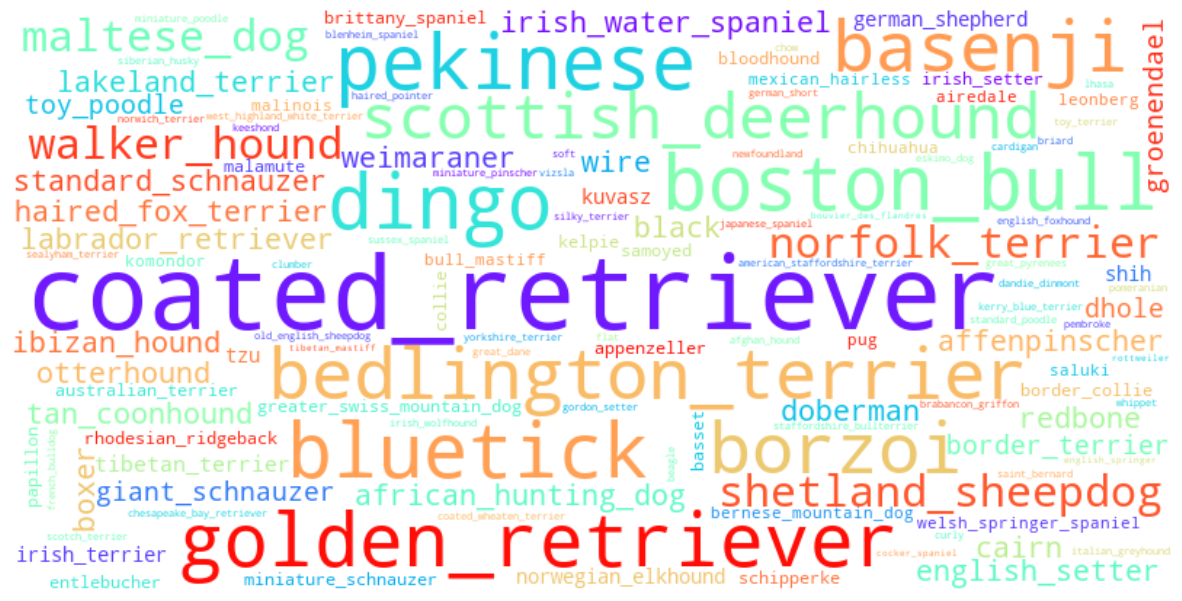

In [16]:
from wordcloud import WordCloud
text = ' '.join(lab)
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="rainbow").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
label_data = encoder.fit_transform(df["breed"].values)
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [20]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

resnet = ResNet50V2(input_shape = [image_size,image_size,3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(num_breed, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()



94668760/94668760 [==============================] - 24s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                          

In [21]:
history = model.fit(train_generator,steps_per_epoch= x_train.shape[0] // batch_size,epochs=10,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)

Epoch 1/10


255/255 [==============================] - 328s 1s/step - loss: 2.7928 - accuracy: 0.3179 - val_loss: 1.4409 - val_accuracy: 0.5843
Epoch 2/10
255/255 [==============================] - 308s 1s/step - loss: 1.8738 - accuracy: 0.4906 - val_loss: 1.2844 - val_accuracy: 0.6220
Epoch 3/10
255/255 [==============================] - 310s 1s/step - loss: 1.6350 - accuracy: 0.5466 - val_loss: 1.2115 - val_accuracy: 0.6548
Epoch 4/10
255/255 [==============================] - 301s 1s/step - loss: 1.4879 - accuracy: 0.5804 - val_loss: 1.2995 - val_accuracy: 0.6419
Epoch 5/10
255/255 [==============================] - 301s 1s/step - loss: 1.3972 - accuracy: 0.6069 - val_loss: 1.2247 - val_accuracy: 0.6706
Epoch 6/10
255/255 [==============================] - 312s 1s/step - loss: 1.2884 - accuracy: 0.6354 - val_loss: 1.2393 - val_accuracy: 0.6488
Epoch 7/10
255/255 [==============================] - 312s 1s/step - loss: 1.2028 - accuracy: 0.6599 - val_loss: 1.2154 - val_accuracy: 0.67

## LIME

This code will provide an explanation for the model's prediction on a randomly selected image from your test set. The explanation will highlight the areas of the image that were most influential in the model's decision, helping you understand why the model made its prediction.

Install LIME (if it's not installed yet)

In [22]:
! pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/275.7 kB 1.3 MB/s eta 0:00:01
     -------- ---------------------------- 61.4/275.7 kB 656.4 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 901.1 kB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=3791545aff8d9b5ac4452d964511038159abb2b007ee77b9ffde725f461d11f6
  Stored in directory: c:\users\yasmine_bettaieb\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Prepare an Individual Image for Explanation:
Select an image from your test set and preprocess it in the same way you did for your training images

In [23]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import io
import contextlib
import sys

In [24]:
# Create a Lime Image Explainer
explainer = lime_image.LimeImageExplainer()

# Select a random image from your test set
test_image_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[test_image_index]

In [25]:
# Function to preprocess the image to be compatible with your model
def model_predict(image_list):
    processed_list = preprocess_input(np.array(image_list, dtype=np.float32))
    preds = model.predict(processed_list)
    return preds

# Function to suppress the output
@contextlib.contextmanager
def suppress_stdout():
    new_stdout = io.StringIO()
    old_stdout = sys.stdout
    try:
        sys.stdout = new_stdout
        yield
    finally:
        sys.stdout = old_stdout

In [26]:
# Use the function to suppress the output of explain_instance
with suppress_stdout():
    explanation = explainer.explain_instance(test_image, 
                                             model_predict, 
                                             top_labels=5, 
                                             hide_color=0, 
                                             num_samples=1000)


# Get image and mask
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=5, 
                                            hide_rest=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

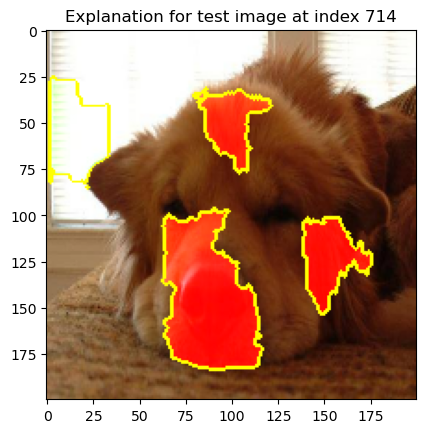

In [28]:
# Plot the image and the mask
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title("Explanation for test image at index {}".format(test_image_index))
plt.show()


## Interpretation of LIME Image Explanation

When interpreting this image, you can expect the following:

- **Green Areas**: The green areas represent parts of the image that positively contribute to the model's prediction. These regions might contain features that the model associates with a specific breed of dog.

- **Yellow Boundaries**: The yellow boundaries delineate the superpixels—segments of the image used by LIME to explain the prediction. LIME perturbs these superpixels and observes how the model's predictions change to determine their importance.

- **Non-highlighted Areas**: Any non-highlighted areas are parts of the image that did not significantly influence the model's prediction, or their influence was neutral.

In summary, this visualization is a way to understand which parts of the image are most influential in the model's decision-making process. For a practitioner, this can be used to gain insights into the model's behavior, potentially revealing whether the model is focusing on the correct features (like the shape of the ears, the color of the fur) or if it is being misled by irrelevant aspects (like the background or a particular accessory like a collar).


## Note:

- **Green Areas**: Typically, green areas would indicate features that positively influence the prediction of the class of interest. In the context of a dog breed classification model, green areas would highlight parts of the image that support the model's decision for the predicted breed.

- **Red Areas**: In some implementations, red might be used instead of green or to indicate a strong positive influence, potentially even more influential than areas highlighted in green. In other cases, red could indicate a negative influence, where the features contribute against the class of interest.

In [29]:
!pip install saliency

     ---------------------------------------- 0.0/86.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/86.2 kB ? eta -:--:--
     ------------------ ------------------- 41.0/86.2 kB 487.6 kB/s eta 0:00:01
     ------------------------------------ - 81.9/86.2 kB 762.6 kB/s eta 0:00:01
     -------------------------------------- 86.2/86.2 kB 538.6 kB/s eta 0:00:00


1/1 [==============================] - 1s 899ms/step


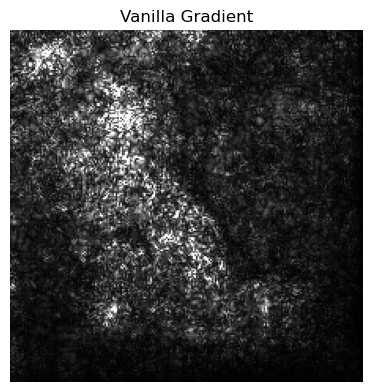

In [37]:
import tensorflow as tf
import numpy as np
import PIL.Image
from matplotlib import pylab as P
import saliency.core as saliency

# Define image size (adjust according to your model)
image_size = 224

# Boilerplate methods.
def ShowImage(im, title='', ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im)
    P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
    P.title(title)

def ShowHeatMap(im, title, ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im, cmap='inferno')
    P.title(title)

def LoadImage(file_path):
    im = PIL.Image.open(file_path)
    im = im.resize((image_size, image_size))
    im = np.asarray(im)
    return im

def PreprocessImage(im):
    im = tf.keras.applications.resnet_v2.preprocess_input(im)
    return im

# Load ResNet50V2 model
resnet = tf.keras.applications.ResNet50V2(input_shape=[image_size, image_size, 3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(num_breed, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet.input, outputs=prediction)

# Compile the model (you can adjust the optimizer and loss function)
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Load an example image
im_path = 'dog.jpg'
im_orig = LoadImage(im_path)
im = PreprocessImage(im_orig)

# Make predictions
predictions = model.predict(np.array([im]))
prediction_class = np.argmax(predictions)
class_idx_str = 'class_idx_str'
call_model_args = {class_idx_str: prediction_class}

# Create a call_model_function for ResNet50V2
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx = call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys == [saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            output_layer = model(images)
            output_layer = output_layer[:, target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

# Create a gradient_saliency instance
gradient_saliency = saliency.GradientSaliency()

# Compute the vanilla mask and the smoothed mask
vanilla_mask_3d = gradient_saliency.GetMask(im, call_model_function, call_model_args)
vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)

# Set up matplotlib figures
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks
ShowGrayscaleImage(vanilla_mask_grayscale, title='Vanilla Gradient', ax=P.subplot(ROWS, COLS, 1))


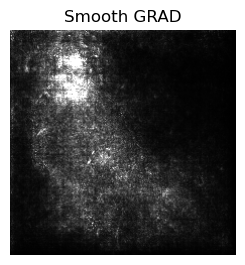

In [44]:

import tensorflow as tf

gradient_saliency = saliency.GradientSaliency()

smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args)

smooth_grad_cam_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ShowGrayscaleImage(smooth_grad_cam_mask_grayscale, title='Smooth GRAD', ax=P.subplot(ROWS, COLS, 1))


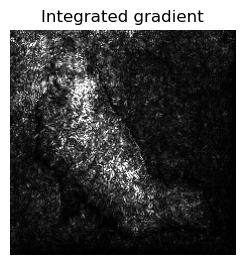

In [49]:
integrated_gradients = saliency.IntegratedGradients()

#INTEGRATED GRAD
Integrated_gradient_grayscale_mask_3d = integrated_gradients.GetMask(im, call_model_function, call_model_args)

Integrated_gradient_grayscale = saliency.VisualizeImageGrayscale(Integrated_gradient_grayscale_mask_3d)
ShowGrayscaleImage(Integrated_gradient_grayscale, title='Integrated gradient', ax=P.subplot(ROWS, COLS, 1))


In [58]:
import pickle
model_bytes = pickle.dumps(model)

# Save the bytes to a file
with open("blackbox_model.pkl", "wb") as f:
    f.write(model_bytes)